# Figura rápida con Matplotlib
Como han contribuido a lo largo del tiempo los 4 paises que más emiten en el 2022 respecto a las emisiones totales e incluir a México

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = "../../data/owid-co2-data.csv"
co2 = pd.read_csv(f)
co2.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [3]:
mascara = (co2['year'] == 2022) & (co2['iso_code'].apply(lambda x: isinstance(x, str) and len(x) == 3))
co2_2022 = co2[mascara]

# # Calculate total CO2 emissions for each country in 2022
co2_2022.groupby('country')['co2'].sum().sort_values(ascending=False).head(10)


country
China            11396.777
United States     5057.304
India             2829.644
Russia            1652.177
Japan             1053.798
Indonesia          728.883
Iran               690.635
Germany            665.605
Saudi Arabia       662.549
South Korea        600.999
Name: co2, dtype: float64

In [4]:
# Asumiendo que 'co2' es el DataFrame original con los datos de emisiones
# Filtrar los datos para incluir solo los cinco "países" de interés
paises_interes = ['China', 'United States', 'India', 'Russia', 'Mexico', 'World']
paises_co2 = co2[co2['country'].isin(paises_interes)]

# Asegurarse de que los datos están ordenados por país y año
paises_co2_sorted = paises_co2.sort_values(by=['country', 'year'])

# Crear una pivot table para organizar los datos adecuadamente para el gráfico
data_pivot = paises_co2_sorted.pivot(index='year', columns='country', values='co2')

# Verificando la estructura de los datos organizados
data_pivot.head()


country,China,India,Mexico,Russia,United States,World
year,,,,,,
1750,NaN,NaN,NaN,NaN,NaN,9.306
1751,NaN,NaN,NaN,NaN,NaN,9.407
1752,NaN,NaN,NaN,NaN,NaN,9.505
1753,NaN,NaN,NaN,NaN,NaN,9.610
1754,NaN,NaN,NaN,NaN,NaN,9.734


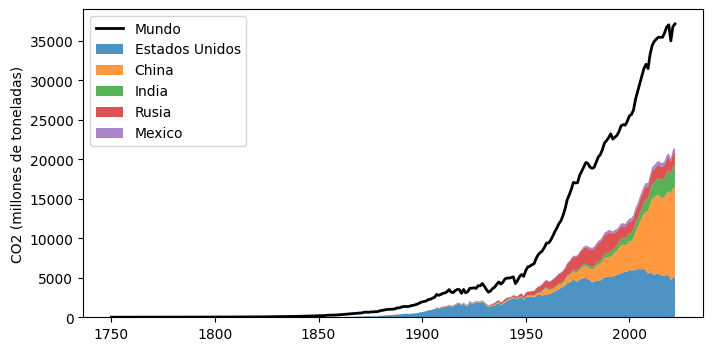

In [5]:

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 4))

# Gráfico de línea para las emisiones globales ('World')
ax.plot(data_pivot.index, data_pivot['World'], label='Mundo', color='black', linewidth=2)

# Stackplot para los cuatro países
ax.stackplot(
    data_pivot.index,
    data_pivot['United States'], 
    data_pivot['China'], 
    data_pivot['India'], 
    data_pivot['Russia'],
    data_pivot['Mexico'],
    labels=['Estados Unidos', 'China', 'India', 'Rusia','Mexico'], 
    alpha=0.8)

# Añadir título y etiquetas
ax.set_ylabel('CO2 (millones de toneladas)')
ax.legend()
plt.show()
